In [1]:
from pybedtools import BedTool
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns
%matplotlib inline

In [11]:
TADs = pd.read_csv("dataSets/TAD_HAR_intersect_count.bed",sep="\t")
variants = pd.read_csv("dataSets/fixed_indels.bed",sep="\t",names=["chrom","start","stop","status"])

In [12]:
TADs.head()

,chrom,start,stop,count
0,chr1,68519317,69794317,1
1,chr1,48899328,50344328,1
2,chr1,163390210,164925763,3
3,chr1,247636698,248231698,0
4,chr1,196105870,196690870,0


In [13]:
TADbed = BedTool.from_dataframe(TADs)
variantsBED = BedTool.from_dataframe(variants)
TADs_w_HARs = TADs.query("count != '0'").copy()
TADs_wOUT_HARs = TADs.query("count == '0'").copy()
cases = variants.query("status == 'case'")
controls = variants.query("status == 'control'")
print('TADs_w_HARs count: '+str(len(TADs_w_HARs)))
print("---------")
print("TADs_wOUT_HARs count: "+str(len(TADs_wOUT_HARs)))
print("---------")
print('check: '+str(len(TADs_w_HARs)+len(TADs_wOUT_HARs)))
print("---------")
print('check: '+str(len(TADs)))
print("---------")
print('Percentage of TADs w/ HARs: ' + str((len(TADs_w_HARs)/len(TADs))*100) + '%')
print('Percentage of TADs w/out HARs: ' + str((len(TADs_wOUT_HARs)/len(TADs))*100) + '%')

TADs_w_HARs count: 1252
---------
TADs_wOUT_HARs count: 7997
---------
check: 9249
---------
check: 9249
---------
Percentage of TADs w/ HARs: 13.536598551194723%
Percentage of TADs w/out HARs: 86.46340144880527%


In [14]:
w_HAR = BedTool.from_dataframe(TADs_w_HARs)
wOUT_HAR = BedTool.from_dataframe(TADs_wOUT_HARs)
case = BedTool.from_dataframe(cases)
control = BedTool.from_dataframe(controls)

In [6]:
print(len(w_HAR))
print(len(wOUT_HAR))
print(len(TADbed))
4084+4159

1252
7997
9249


8243

In [7]:
x = TADbed.intersect(case,u=True)
print(len(x))

4972


In [8]:
case_w_HARs = w_HAR.intersect(case,u=True)
case_wOUT_HARs = wOUT_HAR.intersect(case,u=True)
control_w_HARs = w_HAR.intersect(control,u=True)
control_wOUT_HARs = wOUT_HAR.intersect(control,u=True)

In [9]:
print('case_w_HARs: '+str(len(case_w_HARs)))
print('case_wOUT_HARs: '+str(len(case_wOUT_HARs)))
print('control_w_HARs: '+str(len(control_w_HARs)))
print('control_wOUT_HARs: '+str(len(control_wOUT_HARs)))

case_w_HARs: 888
case_wOUT_HARs: 4084
control_w_HARs: 849
control_wOUT_HARs: 4159


In [10]:
888/4972

0.17860016090104586

In [11]:
obs = np.array([[888,849],[4084,4159]])
chi2, p, dof, expected = chi2_contingency(obs)
print(p)

0.24253521819762075


In [12]:
oddsratio,pvalue = stats.fisher_exact(obs)
oddsratio
pvalue

0.2348914143690377

In [13]:
ww = TADbed.intersect(case,u=True)
yy = TADbed.intersect(control,u=True)
zz = TADbed.intersect(variantsBED,u=True)

In [14]:
xx = case.intersect(control,wa=True,wb=True)
print(xx.head())

chr1	5279606	5279607	case	chr1	5279606	5279607	control
 chr1	39127213	39127214	case	chr1	39127213	39127214	control
 chr1	42565197	42565198	case	chr1	42565197	42565198	control
 chr1	153190867	153190868	case	chr1	153190867	153190868	control
 chr1	179297337	179297338	case	chr1	179297337	179297338	control
 chr1	186926932	186926933	case	chr1	186926932	186926933	control
 chr1	188000216	188000217	case	chr1	188000216	188000217	control
 chr1	194206483	194206484	case	chr1	194206483	194206484	control
 chr1	209836369	209836370	case	chr1	209836369	209836370	control
 chr1	238521418	238521419	case	chr1	238521418	238521419	control
 None


the problem with calculating all intersections with TADs.intersect(variants,u=True) is that the u=True version will only count one interesection per TAD. about 3000 TADs have both a case and a control indel

In [15]:
print((len(ww)+len(yy))-len(zz))

3167


## Kathleen's method for violinplot - start

In [31]:
variants_per_TAD_cases = TADbed.sort().intersect(case.sort(), c=True).to_dataframe()
variants_per_TAD_controls = TADbed.sort().intersect(control.sort(), c=True).to_dataframe()

In [33]:
variants_per_TAD_cases.columns = ['chrom','start','stop','HAR_count','variant_count']
variants_per_TAD_cases['category'] = 'case_variants'
variants_per_TAD_controls.columns = ['chrom','start','stop','HAR_count','variant_count']
variants_per_TAD_controls['category'] = 'control_variants'

In [58]:
variants_per_TAD_cases.head()

,chrom,start,stop,HAR_count,variant_count,category
0,chr1,979620,1069620,0,1,case_variants
1,chr1,1094620,1299620,0,2,case_variants
2,chr1,1319620,1514620,0,3,case_variants
3,chr1,1778561,1908561,0,2,case_variants
4,chr1,1928561,2123561,0,2,case_variants


In [59]:
variants_per_TAD_controls.head()

,chrom,start,stop,HAR_count,variant_count,category
0,chr1,979620,1069620,0,2,control_variants
1,chr1,1094620,1299620,0,0,control_variants
2,chr1,1319620,1514620,0,1,control_variants
3,chr1,1778561,1908561,0,1,control_variants
4,chr1,1928561,2123561,0,0,control_variants


In [36]:
variants_per_TAD = pd.concat([variants_per_TAD_cases, variants_per_TAD_controls])

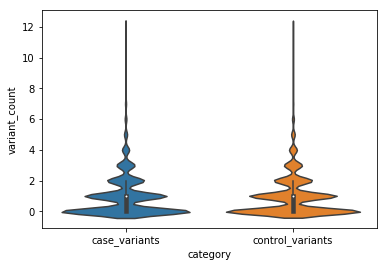

In [39]:
sns.violinplot(x='category', y='variant_count', data=variants_per_TAD)

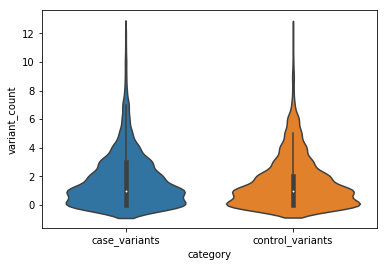

In [62]:
sns.violinplot(x='category', y='variant_count', data=variants_per_TAD.query('HAR_count != "0"'))

In [63]:
variants_per_TAD_cases.query('HAR_count != "0"').describe()

,start,stop,HAR_count,variant_count
count,1.252000e+03,1.252000e+03,1252.000000,1252.000000
mean,8.034659e+07,8.079958e+07,1.462460,1.743610
std,5.690871e+07,5.690395e+07,1.027688,1.881523
min,3.098850e+05,4.548850e+05,1.000000,0.000000
25%,3.389664e+07,3.423829e+07,1.000000,0.000000
50%,6.869616e+07,6.922793e+07,1.000000,1.000000
75%,1.186943e+08,1.190188e+08,2.000000,3.000000
max,2.469667e+08,2.474967e+08,9.000000,12.000000


In [64]:
variants_per_TAD_controls.query('HAR_count != "0"').describe()

,start,stop,HAR_count,variant_count
count,1.252000e+03,1.252000e+03,1252.000000,1252.000000
mean,8.034659e+07,8.079958e+07,1.462460,1.626997
std,5.690871e+07,5.690395e+07,1.027688,1.811414
min,3.098850e+05,4.548850e+05,1.000000,0.000000
25%,3.389664e+07,3.423829e+07,1.000000,0.000000
50%,6.869616e+07,6.922793e+07,1.000000,1.000000
75%,1.186943e+08,1.190188e+08,2.000000,2.000000
max,2.469667e+08,2.474967e+08,9.000000,12.000000


The distributions look pretty similar. 

## Kathleen's method for violinplot - start

now off to make a swarmplot w/ the number of indels in each HAR

In [16]:
x = variantsBED.intersect(w_HAR,c=True)
y = variantsBED.intersect(wOUT_HAR,c=True)

In [17]:
len(TADs)

9249

In [18]:
x = pd.read_table(x.fn,names = ["chrom","start","stop","status","count"])
y = pd.read_table(y.fn,names = ["chrom","start","stop","status","count"])

/Users/eeckenrod/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
/Users/eeckenrod/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [19]:
case_yes = []
control_yes = []
for index, row in x.iterrows():
    if row["status"] == "case" and row["count"] != 0:
        case_yes.append(row["count"])
    elif row["status"] == "control" and row["count"] != 0:
        control_yes.append(row["count"])
print(len(case_yes))
print(len(control_yes))

1811
1705


In [20]:
case_no = []
control_no = []
for index, row in y.iterrows():
    if row["status"] == "case" and row["count"] != 0:
        case_no.append(row["count"])
    elif row["status"] == "control" and row["count"] != 0:
        control_no.append(row["count"])
print(len(case_no))
print(len(control_no))

4939
4909


In [23]:
yes = case_yes + control_yes
no = case_no + control_no
alll = yes + no 
print(len(yes))
print(len(no))

3516
9848


In [25]:
df = pd.DataFrame({"TAD":alll})

In [26]:
df["HAR?"] = ["Has HAR"]*3516 + ["No HAR"]*9848

In [28]:
df["Status"] = ["Case"]*1811 + ["Control"]*1705 + ["Case"]*4939 + ["Control"]*4909

In [29]:
df

,TAD,HAR?,Status
0,1,Has HAR,Case
1,1,Has HAR,Case
2,1,Has HAR,Case
3,1,Has HAR,Case
4,1,Has HAR,Case
5,1,Has HAR,Case
6,1,Has HAR,Case
7,1,Has HAR,Case
8,1,Has HAR,Case
9,2,Has HAR,Case


In [ ]:
sns.swarmplot(y='TAD', x='HAR?',
             hue='Status',data=df)